In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

!pip install -q plotnine
from plotnine import *

import tensorflow as tf
from tensorflow import keras

import math
import keras

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, ElasticNetCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.svm import SVC

In [2]:
data = pd.read_csv("data.csv")

In [3]:
data.isnull().sum()
data[data.rad_flux_infuture.isnull()]

,Unnamed: 0,year,month,day,hour,minute,temperature,humidity,atmospheric_pressure,wind_speed,wind_direction,precipitation,radiation_flux,rad_flux_infuture


Split the data into test and training data:

In [4]:
X = data[['year', 'month', 'day', 'hour', 'minute', 'temperature',
         'humidity', 'atmospheric_pressure', 'wind_speed', 'wind_direction',
         'precipitation', 'radiation_flux']] # 'snow'
y = data['rad_flux_infuture']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [5]:
print('X ',X.shape,', X_train ',X_train.shape,', X_test ',X_test.shape)
print('y ',y.shape,', y_train ',y_train.shape,', y_test ',y_test.shape) 

X  (811085, 12) , X_train  (543426, 12) , X_test  (267659, 12)
y  (811085,) , y_train  (543426,) , y_test  (267659,)


In [6]:

RFR = RandomForestRegressor(n_estimators=20,random_state=0)
RFR.fit(X_train,y_train)


RandomForestRegressor(n_estimators=20, random_state=0)

In [7]:
RFR.score(X_test,y_test)

0.9469243982434629

In [8]:
y_pred = RFR.predict(X_test)

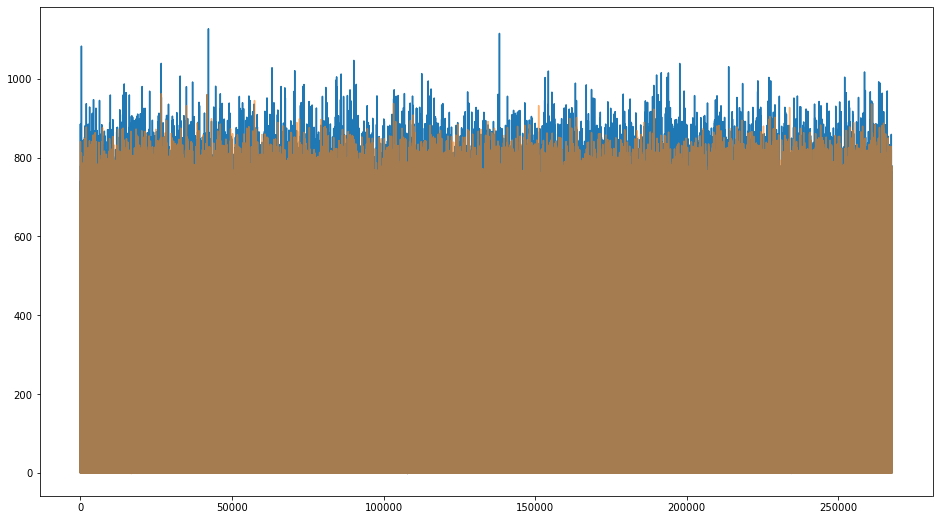

In [9]:
plt.figure(figsize=(16,9))
plt.plot(np.arange(X_test.shape[0]),y_test)
plt.plot(np.arange(X_test.shape[0]),y_pred,'-',alpha=0.6)
plt.show()


In [10]:
training_data = data[data.year<2021]
test_data = data[data.year==2021]
X_train = training_data[['year', 'month', 'day', 'hour', 'minute', 'temperature',
         'humidity', 'atmospheric_pressure', 'wind_speed', 'wind_direction',
         'precipitation', 'radiation_flux']]
y_train = training_data['rad_flux_infuture']
X_test = test_data[['year', 'month', 'day', 'hour', 'minute', 'temperature',
         'humidity', 'atmospheric_pressure', 'wind_speed', 'wind_direction',
         'precipitation', 'radiation_flux']]
y_test = test_data['rad_flux_infuture']

In [11]:
RFR = RandomForestRegressor(n_estimators=20,random_state=0)
RFR.fit(X_train,y_train)

RandomForestRegressor(n_estimators=20, random_state=0)

In [12]:
RFR.score(X_test,y_test)

0.9351817314928398

In [13]:
y_pred=RFR.predict(X_test)

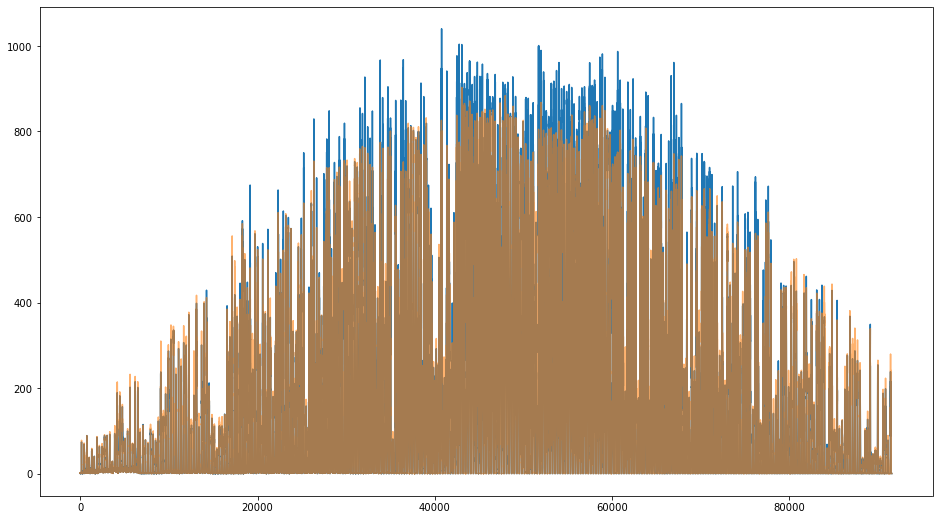

In [14]:
plt.figure(figsize=(16,9))
plt.plot(np.arange(X_test.shape[0]),y_test)
plt.plot(np.arange(X_test.shape[0]),y_pred,'-',alpha=0.6)
plt.show()


In [17]:
ERR = ExtraTreesRegressor()
ERR.fit(X_train,y_train)

ExtraTreesRegressor()

In [18]:
ERR.score(X_test,y_test)

0.938673861711283

In [19]:
y_pred = ERR.predict(X_test)

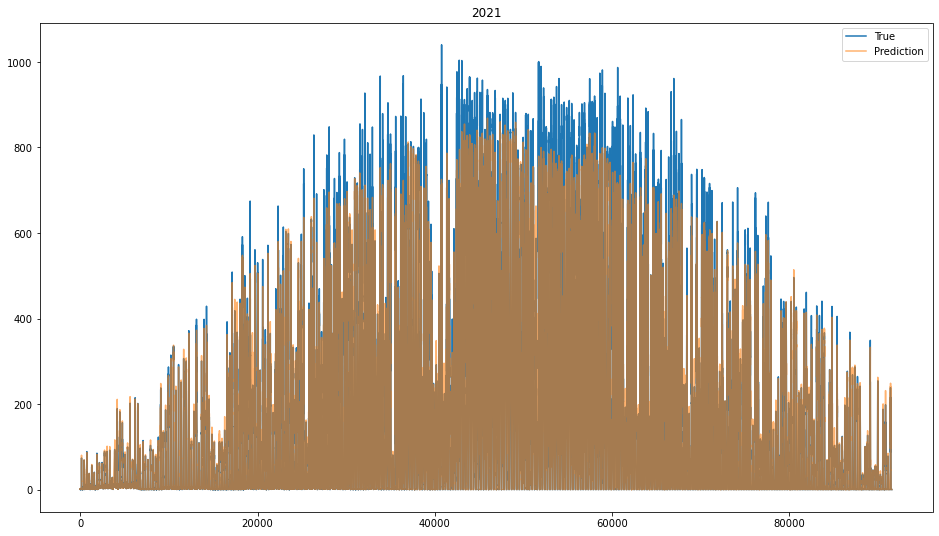

In [23]:
plt.figure(figsize=(16,9))
plt.plot(np.arange(X_test.shape[0]),y_test,label="True")
plt.plot(np.arange(X_test.shape[0]),y_pred,'-',alpha=0.6,label="Prediction")
plt.legend()
plt.title("2021")
plt.show()

In [25]:
LinR = LinearRegression()
LinR.fit(X_train,y_train)
LinR.score(X_test,y_test)

0.9337907593323783

In [28]:
LR = Ridge()
LR.fit(X_train,y_train)
LR.score(X_test,y_test)

0.9337907600348803

In [29]:
LL = Lasso()
LL.fit(X_train,y_train)
LL.score(X_test,y_test)

0.9337918179012819

In [30]:
E = ElasticNet()
E.fit(X_train,y_train)
E.score(X_test,y_test)

0.9337960310232153

# PCA

In [31]:
from sklearn.decomposition import PCA

In [39]:
pca=PCA(n_components=0.9)
pca.fit(X_train)
X_train_compressed = pca.transform(X_train)
X_test_compressed = pca.transform(X_test)

In [40]:
X_train_compressed.shape

(719514, 2)

In [41]:
RF = RandomForestRegressor()
RF.fit(X_train_compressed,y_train)
RF.score(X_test_compressed,y_test)

0.9276690762041325

Worse!!!

# XGBoost

In [15]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 1.3 MB 1.2 MB/s 


In [16]:
import xgboost as xgb


# XGBoosts wants data to be wrapped into special formats
dtrain = xgb.DMatrix(X_train,y_train)
dtest = xgb.DMatrix(X_test,y_test)

# most meaningful parameters
param_list = [("objective", "multi:softmax"), ("eval_metric", "merror"), ("num_class", 10)]

# Number of trees
n_rounds = 600

# if nothing seems to improve for 50 iterations - stop
early_stopping = 50

# train for training and test for ... validation!    
eval_list = [(dtrain, "train"), (dtest, "validation")]

# 1,2,3.. go!
bst = xgb.train(param_list, dtrain, n_rounds, evals=eval_list, early_stopping_rounds=early_stopping, verbose_eval=True)


XGBoostError: 
XGBoost Library (libxgboost.dylib) could not be loaded.
Likely causes:
  * OpenMP runtime is not installed
    - vcomp140.dll or libgomp-1.dll for Windows
    - libomp.dylib for Mac OSX
    - libgomp.so for Linux and other UNIX-like OSes
    Mac OSX users: Run `brew install libomp` to install OpenMP runtime.

  * You are running 32-bit Python on a 64-bit OS

Error message(s): ['dlopen(/Users/heidi/.local/lib/python3.8/site-packages/xgboost/lib/libxgboost.dylib, 6): Library not loaded: /usr/local/opt/libomp/lib/libomp.dylib\n  Referenced from: /Users/heidi/.local/lib/python3.8/site-packages/xgboost/lib/libxgboost.dylib\n  Reason: image not found']


In [ ]:
ypred = bst.predict(dtest) #, iteration_range=(0, bst.best_iteration + 1)) # this iteration_range do not work, but was in the documentation page.. weird
ypred.shape
print(f'Accuracy of XGBoost is {(np.sum(ypred==test_labels)/test_labels.shape[0])*100}%')